# Diabetes Prediction
The objective of this analysis is to create a prediction model of whether a patient has diabetes, based on certain diagnostic measurements in a dataset sourced from [Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset). 
The Analysis will include:
- Data preparation
- Exploratory Data Analysis
- Model Building
- Conclusion

## 1. Data Preparation
This will involve checking for missing data, duplicates and inconsistencies.

### 1.1 Data Description
The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. This data was selected from a larger database and in particular in this dataset, all patients are females at least 21 years old of Pima Indian heritage.

The dataset can be found in [Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

The columns in the dataset are:
- `Pregnancies`: To express the Number of pregnancies.
- `Glucose`: To express the Glucose level in blood.
- `BloodPressure`: To express the Blood pressure measurement.
- `SkinThickness`: To express the thickness of the skin.
- `Insulin`: To express the Insulin level in blood.
- `BMI`: To express the Body mass index.
- `DiabetesPedigreeFunction`: To express the Diabetes percentage.
- `Age`: To express the age.
- `Outcome:` To express the final result on whether a patient has diabetes, 1 is Yes and 0 is No.

In [1]:
# Imports and Loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
data = pd.read_csv('/Users/user/Desktop/Analytics/Data/diabetes.csv')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 1.2 Checking for missing values, data types and Duplicates
- The dataset has 768 records and 9 columns.
- The data has no missing values.
- The data has no duplicate values.
- All the columns in the dataset are numerical.

In [3]:
# Number or records and fields
print('-------------------------------------')
print('Data shape:', data.shape)
print('-------------------------------------')

# Basic data information
print(data.info())
print('-------------------------------------')

# Checking for missing values
print('Missing Values:\n', data.isna().sum())
print('-------------------------------------')

# Checking for duplicates
print('Number of Duplicates:', len(data[data.duplicated()]))
print('-------------------------------------')

-------------------------------------
Data shape: (768, 9)
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
-------------------------------------
Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure          

## 2. Exploratory Data Analysis
This includes the data summary statistics, the distribution of variables, and checking the correlation between variables.

### 2.1 Summary statistics

In [4]:
# Summary statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2.2 Distribution of Variables
The distribution of all the variables is illustrated in the histograms. From the histograms: 
- **`Pregnancies`:** There seem to be a few outliers with very few women having more than 10 pregnancies.
- **`Glucose`:** The distribution is approximately normal with an outlier to the left.
- **`BloodPressure`:** The distribution is approximately normal with only a few outliers on both sides.
- **`SkinThickness`:** There are many observations between 0 and 20. There is an outlier to the right.
- **`Insulin`:** Majority of the patients' insulin level is below 200 with several outliers to the right.
- **`BMI`:** The distribution is approximately normal with a few outliers to the right and one to the left.
- **`DiabetesPedigreeFunction`:** A Few patients have a pedigree above 1.5 which lie as outliers.
- **`Age`:** Most patients are aged between 21 and 50 years. Patients above 66 are considered outliers.
- **`Outcome`:** We have more negative (No) outcomes than positive (Yes) outcomes.

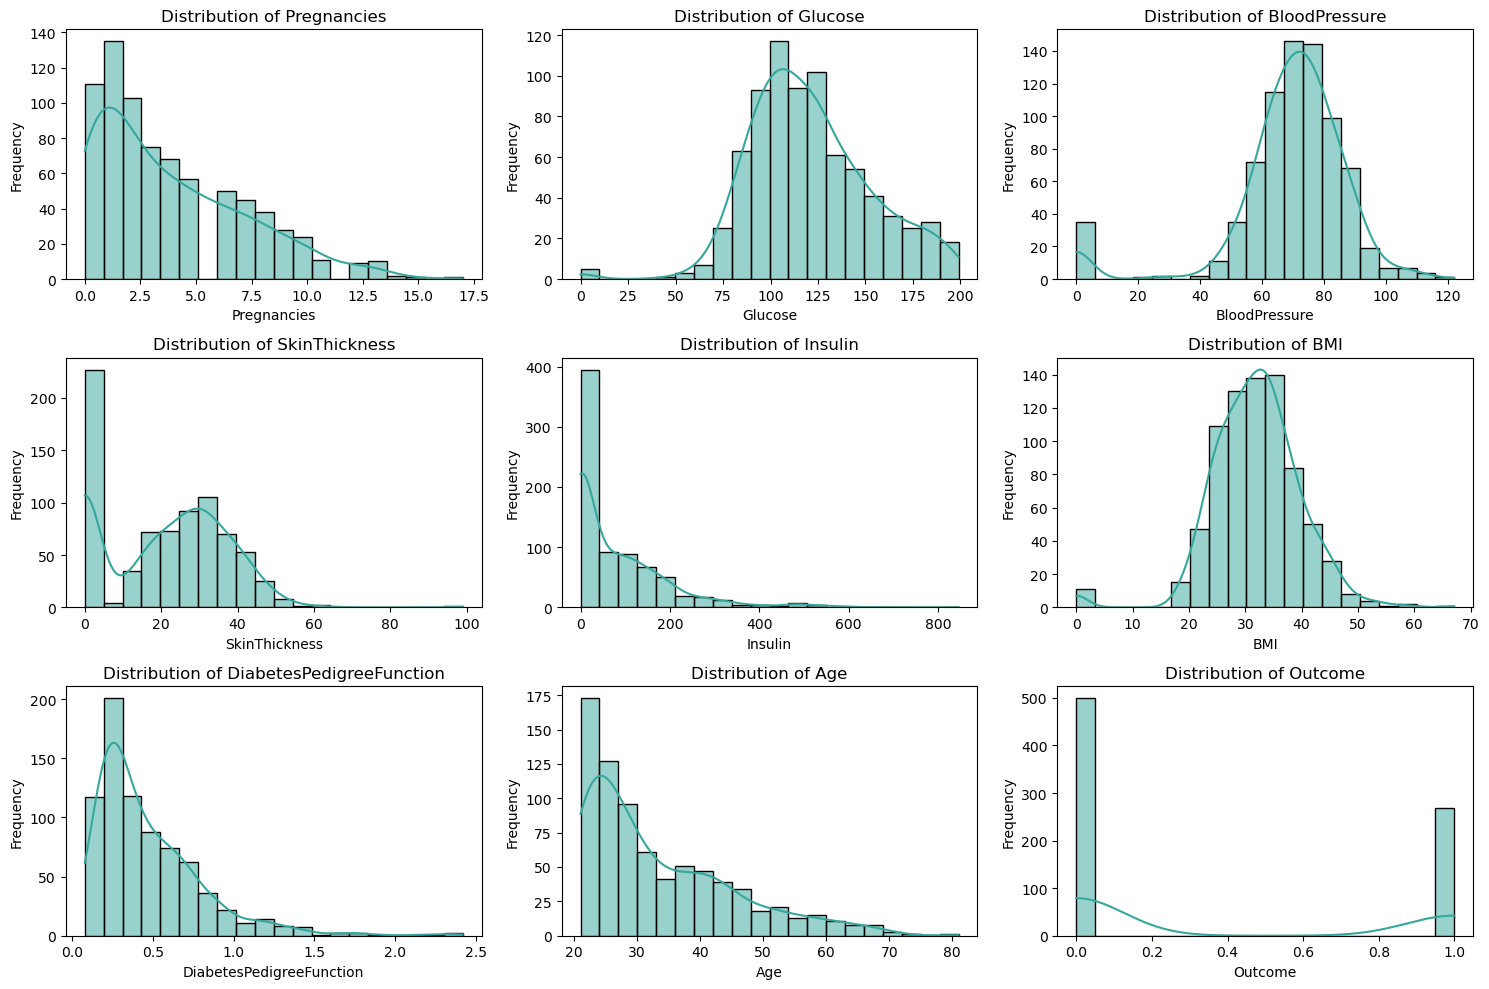

In [5]:
# Investigating the distribution of the columns
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, ax=axes[i], bins=20, color='#35a79c')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

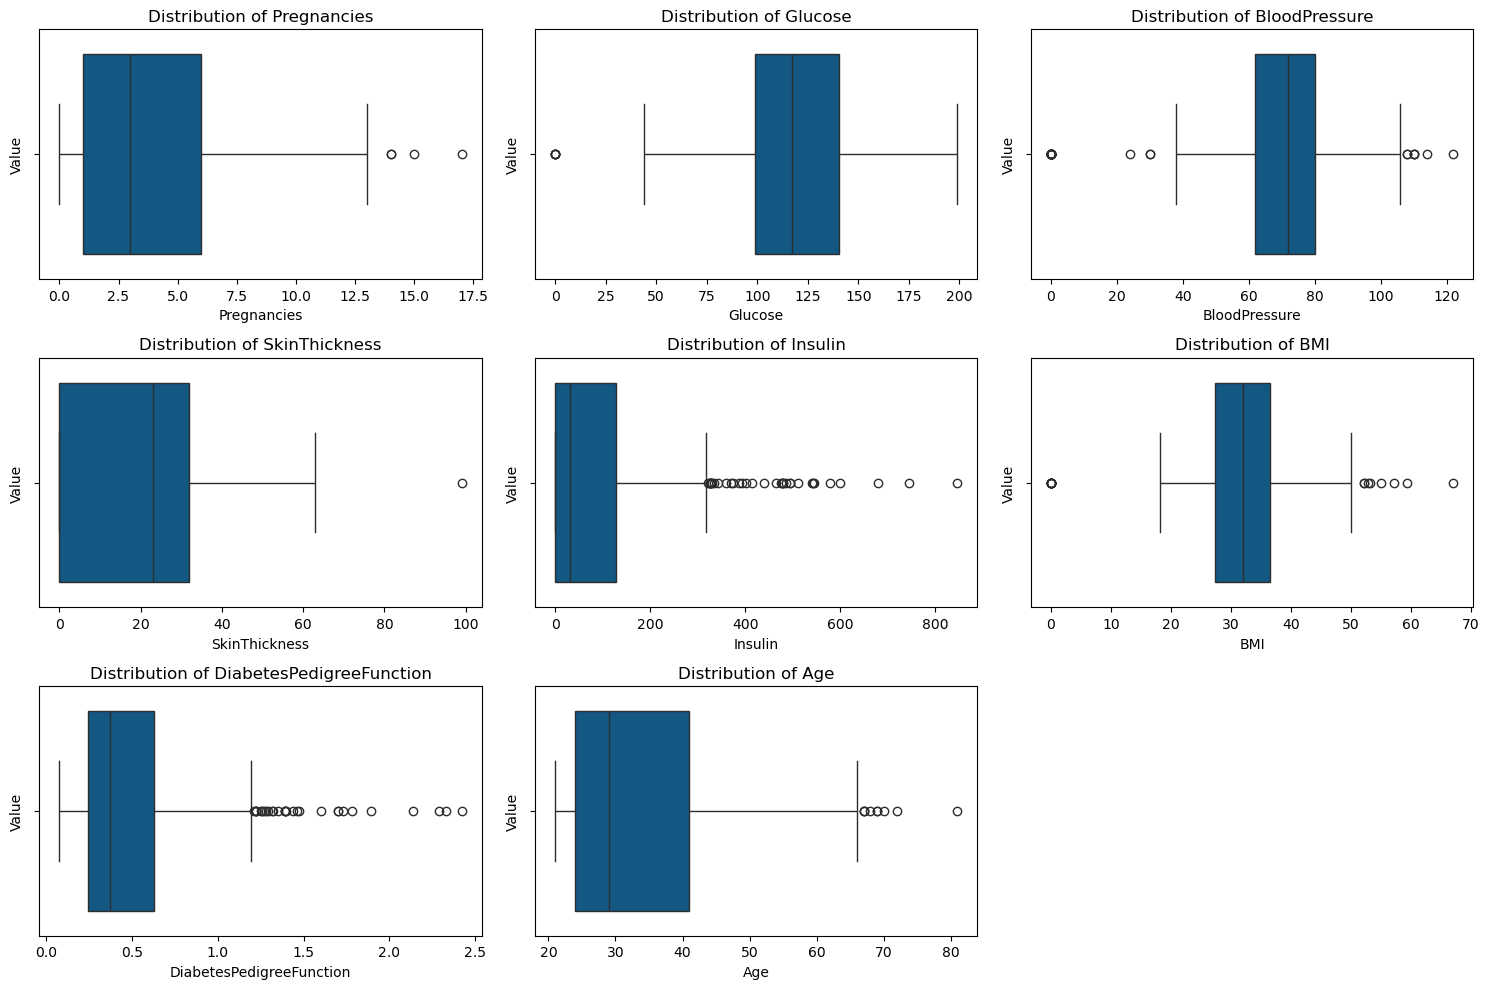

In [6]:
# Investigating the distribution of the columns below
box_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create subplots dynamically based on columns below
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(box_columns):
    sns.boxplot(data=data, x=column, ax=axes[i], color='#005b96')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### 2.3 Correlation between Variables
- There is a weak correlation between most of the individual variables.
- There is a moderate correlation between `Age` and `Pregnancy`.
- `Glucose` is the most correlated variable to the `outcome`.
- `BloodPressure` and `SkinThickness` are the least correlated to the `outcome` variable.

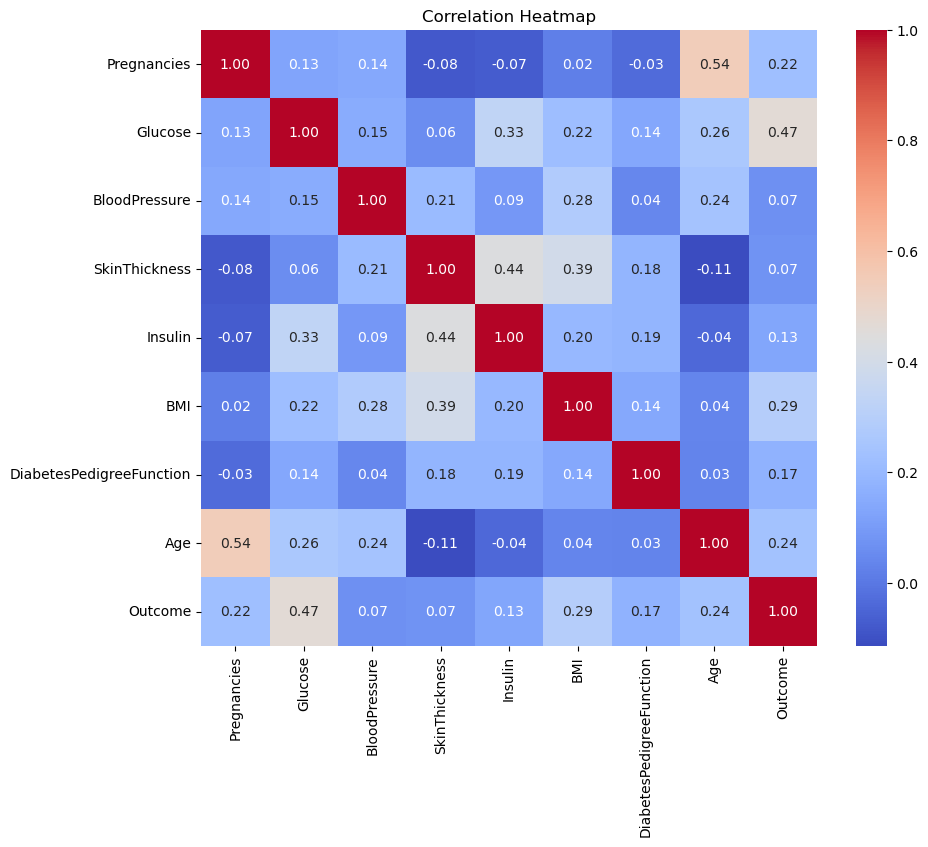

In [7]:
# Plot the heatmap for the correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Correlation with the target variable (Outcome)
correlation_matrix = data.corr()
outcome_corr = correlation_matrix["Outcome"].sort_values(ascending=False)
print("Correlation with Outcome:")
print(outcome_corr)

Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


### 2.4 Checking for Multicollinearity
There was no evidence of multicollinear features. All features had a VIF less than 5.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data.drop('Outcome', axis=1))
vif = pd.DataFrame({
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    "Feature": X.columns,
})
print(vif)

         VIF                   Feature
0  35.039974                     const
1   1.430872               Pregnancies
2   1.298961                   Glucose
3   1.181863             BloodPressure
4   1.507432             SkinThickness
5   1.427536                   Insulin
6   1.297450                       BMI
7   1.067090  DiabetesPedigreeFunction
8   1.588368                       Age


### 2.5 Dealing with Outliers
To deal with the outliers:

- `Pregnancies`: We retain the outliers since they may be medically plausible and they are few.
- `Glucose`: A glucose level between 0 and 5 is likely an error or an extreme abnormality so we impute with the median value.
- `BloodPressure`,`SkinThickness`, `BMI`,`Age`: We replace outliers with the median.
- `Insulin`: With multiple outliers, we will apply a log transformation to reduce skewness.
- `DiabetesPedigreeFunction`: We retain the outliers.

In [10]:
# Replacing outliers with the median value
columns_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age']

for column in columns_replace:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the median for the column
    median_value = data[column].median()
    
    # Replace outliers with the median
    data[column] = np.where(
        (data[column] < lower_bound) | (data[column] > upper_bound),
        median_value,
        data[column]
    )

# Applying log transformation to Insulin
data['Insulin'] = np.log1p(data['Insulin'])

### 2.6 Splitting data to Train-Test Set

In [11]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Machine Learning Model Building

### 3.1 Logistic Regression
- **Performance:** There is no significant improvement in testing accuracy after hyperparameter tuning. Both the default and tuned models have the same accuracy on the test set (0.69).
- **Class Imbalance:** The model struggles more with predicting the positive class (class 1), as evidenced by the lower recall and precision values for class 1 compared to class 0. This could be due to lower positive cases in the dataset.

In [12]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Default Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Predictions and Accuracy
y_pred_train_log = log_reg.predict(X_train_scaled)
y_pred_test_log = log_reg.predict(X_test_scaled)

train_accuracy_log = accuracy_score(y_train, y_pred_train_log)
test_accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression - Default Parameters")
print(f"Training Accuracy: {train_accuracy_log:.2f}")
print(f"Testing Accuracy: {test_accuracy_log:.2f}")

# Classification report
print("\nLogistic Regression - Default Parameters")
print(classification_report(y_test, y_pred_log))
print('----------------------------------------------------------------')

# Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
log_reg_tuned = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5)
log_reg_tuned.fit(X_train_scaled, y_train)
y_pred_log_tuned = log_reg_tuned.best_estimator_.predict(X_test_scaled)

# Predictions and Accuracy for Tuned Model
y_pred_train_log_tuned = log_reg_tuned.best_estimator_.predict(X_train_scaled)
y_pred_test_log_tuned = log_reg_tuned.best_estimator_.predict(X_test_scaled)

train_accuracy_log_tuned = accuracy_score(y_train, y_pred_train_log_tuned)
test_accuracy_log_tuned = accuracy_score(y_test, y_pred_log_tuned)
print("Logistic Regression - Tuned Parameters")
print(f"Training Accuracy: {train_accuracy_log_tuned:.2f}")
print(f"Testing Accuracy: {test_accuracy_log_tuned:.2f}")

# Classification report
print("\nLogistic Regression - Tuned Parameters")
print(classification_report(y_test, y_pred_log_tuned))

Logistic Regression - Default Parameters
Training Accuracy: 0.79
Testing Accuracy: 0.69

Logistic Regression - Default Parameters
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

----------------------------------------------------------------
Logistic Regression - Tuned Parameters
Training Accuracy: 0.79
Testing Accuracy: 0.69

Logistic Regression - Tuned Parameters
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.56      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



### 3.2 Decision Tree Classifier
- **Overfitting in Default Model:** The decision tree model exhibits overfitting, with perfect training accuracy (1.00) but a much lower testing accuracy (0.67). This is indicative of the model memorizing the training data rather than generalizing well to unseen data.
- **Class Imbalance:** Similar to Logistic Regression, the decision tree struggles with the positive class (class 1), as evidenced by the lower recall and precision values for class 1 in both default and tuned models.
- **Improved Performance with Tuning:** After hyperparameter tuning, the model's testing accuracy slightly improves to 0.69. However, it still performs poorly on class 1 (low recall), suggesting that tuning might not have fully resolved the class imbalance issue.
- **Recall and Precision Tradeoff:** The tuned model shows high recall for class 0 (0.92) but significantly lower recall for class 1 (0.28), indicating that the model heavily favors class 0 and misclassifies many instances of class 1.

In [13]:
# Default Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Predictions and Accuracy
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree - Default Parameters")
print(f"Training Accuracy: {train_accuracy_dt:.2f}")
print(f"Testing Accuracy: {test_accuracy_dt:.2f}")

# Classification report
print("\nDecision Tree - Default Parameters")
print(classification_report(y_test, y_pred_dt))
print('----------------------------------------------------------------')

# Hyperparameter Tuning
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_tuned = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
dt_tuned.fit(X_train, y_train)
y_pred_dt_tuned = dt_tuned.best_estimator_.predict(X_test)

# Predictions and Accuracy for Tuned Model
y_pred_train_dt_tuned = dt_tuned.best_estimator_.predict(X_train)
y_pred_test_dt_tuned = dt_tuned.best_estimator_.predict(X_test)

train_accuracy_dt_tuned = accuracy_score(y_train, y_pred_train_dt_tuned)
test_accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
print("Decision Tree - Tuned Parameters")
print(f"Training Accuracy: {train_accuracy_dt_tuned:.2f}")
print(f"Testing Accuracy: {test_accuracy_dt_tuned:.2f}")

# Classification report
print("\nDecision Tree - Tuned Parameters")
print(classification_report(y_test, y_pred_dt_tuned))

Decision Tree - Default Parameters
Training Accuracy: 1.00
Testing Accuracy: 0.67

Decision Tree - Default Parameters
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       100
           1       0.53      0.54      0.53        54

    accuracy                           0.67       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.67      0.67       154

----------------------------------------------------------------
Decision Tree - Tuned Parameters
Training Accuracy: 0.76
Testing Accuracy: 0.69

Decision Tree - Tuned Parameters
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       100
           1       0.65      0.28      0.39        54

    accuracy                           0.69       154
   macro avg       0.68      0.60      0.59       154
weighted avg       0.68      0.69      0.65       154



### 3.3 K-Nearest Neighbors Classifier
- **Overfitting in Default Model:** The K-Nearest Neighbors model shows a high training accuracy of 0.83, indicating possible overfitting, as the testing accuracy drops to 0.69.
- **Class Imbalance:** Similar to the previous models, there is a noticeable imbalance in the recall for class 1. The model performs worse on class 1, with a recall of 0.56 (default) and 0.50 (tuned), indicating difficulty in correctly identifying instances of the positive class.
- **Slight Performance Drop After Tuning:** After tuning the model's hyperparameters, testing accuracy drops slightly from 0.69 (default) to 0.68. While there is a small improvement in precision for class 0, recall and f1-score for class 1 still remain low, highlighting challenges in balancing class predictions.
- **Recall vs Precision:** The recall for class 0 is relatively high (0.76-0.78), but class 1 suffers from low recall (0.50-0.56), signaling that the model is favoring the majority class (class 0).

In [14]:
# Default K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Predictions and Accuracy
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors - Default Parameters")
print(f"Training Accuracy: {train_accuracy_knn:.2f}")
print(f"Testing Accuracy: {test_accuracy_knn:.2f}")

# Classification report
print("\nK-Nearest Neighbors - Default Parameters")
print(classification_report(y_test, y_pred_knn))
print('----------------------------------------------------------------')

# Hyperparameter Tuning
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_tuned = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.best_estimator_.predict(X_test)

# Predictions and Accuracy for Tuned Model
y_pred_train_knn_tuned = knn_tuned.best_estimator_.predict(X_train)
y_pred_test_knn_tuned = knn_tuned.best_estimator_.predict(X_test)

train_accuracy_knn_tuned = accuracy_score(y_train, y_pred_train_knn_tuned)
test_accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print("K-Nearest Neighbors - Tuned Parameters")
print(f"Training Accuracy: {train_accuracy_knn_tuned:.2f}")
print(f"Testing Accuracy: {test_accuracy_knn_tuned:.2f}")

# Classification report
print("\nK-Nearest Neighbors - Tuned Parameters")
print(classification_report(y_test, y_pred_knn_tuned))

K-Nearest Neighbors - Default Parameters
Training Accuracy: 0.83
Testing Accuracy: 0.69

K-Nearest Neighbors - Default Parameters
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       100
           1       0.56      0.56      0.56        54

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

----------------------------------------------------------------
K-Nearest Neighbors - Tuned Parameters
Training Accuracy: 0.81
Testing Accuracy: 0.68

K-Nearest Neighbors - Tuned Parameters
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.55      0.50      0.52        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.68      0.68       154



### 3.4 Bagging Classifier
- **Overfitting in Default Model:** The Bagging Classifier model shows a high training accuracy of 0.98, suggesting overfitting since the testing accuracy is 0.74.
- **Class Imbalance:** Similar to other models, there is an imbalance in recall, especially for class 1, which has a recall of 0.56 (default) and 0.57 (tuned). This indicates that the model struggles with identifying instances of the positive class.
- **Performance Improvement with Tuning:** After hyperparameter tuning, the testing accuracy improves slightly from 0.74 to 0.75. Precision for class 0 increases slightly, but recall for class 1 remains low. The tuned model performs similarly to the default model but with minor improvements in precision.
- **Balanced Performance on Class 0:** The recall and f1-score for class 0 are relatively good (0.84 and 0.81 for default; 0.85 and 0.82 for tuned), showing that the model identifies the majority class well. However, the model still faces challenges with class 1.

In [15]:
# Default Bagging Classifier
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

# Predictions and Accuracy
y_pred_train_bag = bagging.predict(X_train)
y_pred_test_bag = bagging.predict(X_test)

train_accuracy_bag = accuracy_score(y_train, y_pred_train_bag)
test_accuracy_bag = accuracy_score(y_test, y_pred_bag)
print("Bagging Classifier - Default Parameters")
print(f"Training Accuracy: {train_accuracy_bag:.2f}")
print(f"Testing Accuracy: {test_accuracy_bag:.2f}")

# Classification report
print("\nBagging Classifier - Default Parameters")
print(classification_report(y_test, y_pred_bag))
print('----------------------------------------------------------------')

# Hyperparameter Tuning
param_grid = {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 0.7, 1.0]}
bagging_tuned = GridSearchCV(BaggingClassifier(random_state=42), param_grid, cv=5)
bagging_tuned.fit(X_train, y_train)
y_pred_bag_tuned = bagging_tuned.best_estimator_.predict(X_test)

# Predictions and Accuracy for Tuned Model
y_pred_train_bag_tuned = bagging_tuned.best_estimator_.predict(X_train)
y_pred_test_bag_tuned = bagging_tuned.best_estimator_.predict(X_test)

train_accuracy_bag_tuned = accuracy_score(y_train, y_pred_train_bag_tuned)
test_accuracy_bag_tuned = accuracy_score(y_test, y_pred_bag_tuned)
print("Bagging Classifier - Tuned Parameters")
print(f"Training Accuracy: {train_accuracy_bag_tuned:.2f}")
print(f"Testing Accuracy: {test_accuracy_bag_tuned:.2f}")

# Classification report
print("\nBagging Classifier - Tuned Parameters")
print(classification_report(y_test, y_pred_bag_tuned))

Bagging Classifier - Default Parameters
Training Accuracy: 0.98
Testing Accuracy: 0.74

Bagging Classifier - Default Parameters
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154

----------------------------------------------------------------
Bagging Classifier - Tuned Parameters
Training Accuracy: 0.95
Testing Accuracy: 0.75

Bagging Classifier - Tuned Parameters
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



### 3.5 Random Forest Classifier
- **Overfitting in Default Model:** Random Forest shows high training accuracy of 1.00, which indicates overfitting. The testing accuracy is slightly lower at 0.76.
- **Performance on Class 0:** The model performs well on class 0, with a recall of 0.83 (default) and 0.85 (tuned), and an f1-score of 0.82 (default) and 0.83 (tuned), indicating strong performance in identifying the majority class.
- **Struggles with Class 1:** The recall for class 1 is lower (0.63 in the default model and 0.61 in the tuned model), showing that the model struggles to correctly identify the minority class.
- **Minor Improvement After Tuning:** Hyperparameter tuning led to a small increase in testing accuracy (from 0.76 to 0.77), with only slight improvements in precision and recall for class 1. The performance on class 0 remained similar.
- **Balanced Overall:** While the model performs well on class 0, it still faces challenges with class imbalance, as reflected in the lower recall for class 1, although there was a slight improvement in precision.

In [16]:
# Default Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Predictions and Accuracy
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest - Default Parameters")
print(f"Training Accuracy: {train_accuracy_rf:.2f}")
print(f"Testing Accuracy: {test_accuracy_rf:.2f}")

# Classification report
print("\nRandom Forest - Default Parameters")
print(classification_report(y_test, y_pred_rf))
print('----------------------------------------------------------------')

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100,200], 
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5]
}
rf_tuned = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42), param_grid, cv=5, scoring='accuracy')
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.best_estimator_.predict(X_test)

# Predictions and Accuracy for Tuned Model
y_pred_train_rf_tuned = rf_tuned.best_estimator_.predict(X_train)
y_pred_test_rf_tuned = rf_tuned.best_estimator_.predict(X_test)

train_accuracy_rf_tuned = accuracy_score(y_train, y_pred_train_rf_tuned)
test_accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print("Random Forest - Tuned Parameters")
print(f"Training Accuracy: {train_accuracy_rf_tuned:.2f}")
print(f"Testing Accuracy: {test_accuracy_rf_tuned:.2f}")

# Classification report
print("\nRandom Forest - Tuned Parameters")
print(classification_report(y_test, y_pred_rf_tuned))

Random Forest - Default Parameters
Training Accuracy: 1.00
Testing Accuracy: 0.76

Random Forest - Default Parameters
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

----------------------------------------------------------------
Random Forest - Tuned Parameters
Training Accuracy: 0.97
Testing Accuracy: 0.77

Random Forest - Tuned Parameters
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



### 3.6 AdaBoost Classifier
- **Improvement in Testing Accuracy After Tuning:** AdaBoost showed a slight improvement in testing accuracy after tuning, increasing from 0.73 to 0.74.
- **Better Recall for Class 0:** The recall for class 0 improved from 0.81 (default) to 0.88 (tuned), showing that the tuned model is better at correctly identifying the majority class.
- **Struggles with Class 1:** Despite the tuning, recall for class 1 remains low, dropping from 0.59 (default) to 0.48 (tuned), indicating that the model still has difficulty identifying the minority class.
- **Precision Trade-off:** There is a trade-off in precision for class 1. While precision slightly increased from 0.63 (default) to 0.68 (tuned), recall did not improve significantly, showing that tuning helps with precision but not with correctly identifying the minority class.
- **Overall Balanced Performance:** AdaBoost’s performance is balanced for class 0, but it still struggles to handle the minority class effectively, even after hyperparameter tuning.

In [17]:
# Default AdaBoost Classifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# Predictions and Accuracy
y_pred_train_ada = ada.predict(X_train)
y_pred_test_ada = ada.predict(X_test)

train_accuracy_ada = accuracy_score(y_train, y_pred_train_ada)
test_accuracy_ada = accuracy_score(y_test, y_pred_test_ada)
print("AdaBoost Classifier - Default Parameters")
print(f"Training Accuracy: {train_accuracy_ada:.2f}")
print(f"Testing Accuracy: {test_accuracy_ada:.2f}")

# Classification report
print("\nAdaBoost Classifier - Default Parameters")
print(classification_report(y_test, y_pred_ada))
print('----------------------------------------------------------------')

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 1, 10]
}
ada_tuned = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5)
ada_tuned.fit(X_train, y_train)
y_pred_ada_tuned = ada_tuned.best_estimator_.predict(X_test)

# Predictions and Accuracy for Tuned Model
y_pred_train_ada_tuned = ada_tuned.best_estimator_.predict(X_train)
y_pred_test_ada_tuned = ada_tuned.best_estimator_.predict(X_test)

train_accuracy_ada_tuned = accuracy_score(y_train, y_pred_train_ada_tuned)
test_accuracy_ada_tuned = accuracy_score(y_test, y_pred_ada_tuned)
print("AdaBoost Classifier - Tuned Parameters")
print(f"Training Accuracy: {train_accuracy_ada_tuned:.2f}")
print(f"Testing Accuracy: {test_accuracy_ada_tuned:.2f}")

# Classification report
print("\nAdaBoost Classifier - Tuned Parameters")
print(classification_report(y_test, y_pred_ada_tuned))

AdaBoost Classifier - Default Parameters
Training Accuracy: 0.83
Testing Accuracy: 0.73

AdaBoost Classifier - Default Parameters
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

----------------------------------------------------------------
AdaBoost Classifier - Tuned Parameters
Training Accuracy: 0.78
Testing Accuracy: 0.74

AdaBoost Classifier - Tuned Parameters
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



### 3.7 Gradient Boosting Classifier
- **Decrease in Testing Accuracy After Tuning:** Gradient Boosting shows a slight decrease in testing accuracy after tuning, from 0.77 (default) to 0.74 (tuned).
- **Stable Precision for Class 0:** Precision for class 0 remains stable at 0.80 (default) and 0.78 (tuned), with a slight decrease after tuning.
- **Drop in Recall for Class 1:** Recall for class 1 drops from 0.61 (default) to 0.56 (tuned), indicating that the tuning did not significantly improve the model’s ability to identify the minority class.
- **Overfitting:** The training accuracy decreased from 0.92 (default) to 0.83 (tuned), which suggests the tuned model is less prone to overfitting compared to the default model.

In [18]:
# Default Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Predictions and Accuracy
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

train_accuracy_gb = accuracy_score(y_train, y_pred_train_gb)
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier - Default Parameters")
print(f"Training Accuracy: {train_accuracy_gb:.2f}")
print(f"Testing Accuracy: {test_accuracy_gb:.2f}")

# Classification report
print("\nGradient Boosting Classifier - Default Parameters")
print(classification_report(y_test, y_pred_gb))
print('----------------------------------------------------------------')

# Hyperparameter Tuning
param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
gb_tuned = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
gb_tuned.fit(X_train, y_train)
y_pred_gb_tuned = gb_tuned.best_estimator_.predict(X_test)

# Predictions and Accuracy for Tuned Model
y_pred_train_gb_tuned = gb_tuned.best_estimator_.predict(X_train)
y_pred_test_gb_tuned = gb_tuned.best_estimator_.predict(X_test)

train_accuracy_gb_tuned = accuracy_score(y_train, y_pred_train_gb_tuned)
test_accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
print("Gradient Boosting Classifier - Tuned Parameters")
print(f"Training Accuracy: {train_accuracy_gb_tuned:.2f}")
print(f"Testing Accuracy: {test_accuracy_gb_tuned:.2f}")

# Classification report
print("\nGradient Boosting Classifier - Tuned Parameters")
print(classification_report(y_test, y_pred_gb_tuned))

Gradient Boosting Classifier - Default Parameters
Training Accuracy: 0.92
Testing Accuracy: 0.77

Gradient Boosting Classifier - Default Parameters
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

----------------------------------------------------------------
Gradient Boosting Classifier - Tuned Parameters
Training Accuracy: 0.83
Testing Accuracy: 0.74

Gradient Boosting Classifier - Tuned Parameters
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73 

### 3.8 XGBoost Classifier
- **Decrease in Testing Accuracy After Tuning:** Gradient Boosting shows a slight decrease in testing accuracy after tuning, from 0.77 (default) to 0.74 (tuned).
- **Stable Precision for Class 0:** Precision for class 0 remains stable at 0.80 (default) and 0.78 (tuned), with a slight decrease after tuning.
- **Drop in Recall for Class 1:** Recall for class 1 drops from 0.61 (default) to 0.56 (tuned), indicating that the tuning did not significantly improve the model’s ability to identify the minority class.
- **Overfitting:** The training accuracy decreased from 0.92 (default) to 0.83 (tuned), which suggests the tuned model is less prone to overfitting compared to the default model.

In [19]:
# Default XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Predictions and Accuracy
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

train_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier - Default Parameters")
print(f"Training Accuracy: {train_accuracy_xgb:.2f}")
print(f"Testing Accuracy: {test_accuracy_xgb:.2f}")

# Classification report
print("\nXGBoost Classifier - Default Parameters")
print(classification_report(y_test, y_pred_xgb))
print('----------------------------------------------------------------')

# Hyperparameter Tuning
param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
xgb_tuned = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5)
xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned.best_estimator_.predict(X_test)

# Predictions and Accuracy for Tuned Model
y_pred_train_xgb_tuned = xgb_tuned.best_estimator_.predict(X_train)
y_pred_test_xgb_tuned = xgb_tuned.best_estimator_.predict(X_test)

train_accuracy_xgb_tuned = accuracy_score(y_train, y_pred_train_xgb_tuned)
test_accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print("XGBoost Classifier - Tuned Parameters")
print(f"Training Accuracy: {train_accuracy_xgb_tuned:.2f}")
print(f"Testing Accuracy: {test_accuracy_xgb_tuned:.2f}")

# Classification report
print("\nXGBoost Classifier - Tuned Parameters")
print(classification_report(y_test, y_pred_xgb_tuned))


XGBoost Classifier - Default Parameters
Training Accuracy: 1.00
Testing Accuracy: 0.73

XGBoost Classifier - Default Parameters
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

----------------------------------------------------------------
XGBoost Classifier - Tuned Parameters
Training Accuracy: 0.82
Testing Accuracy: 0.73

XGBoost Classifier - Tuned Parameters
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



### 3.9 Support Vector Machine (SVM model)
- **Testing Accuracy:** The testing accuracy drops from 0.72 (default) to 0.69 (tuned), indicating a decrease in generalization performance after tuning.
- **Class 0 Performance:** Precision and recall for class 0 remain similar across default (0.74 precision, 0.87 recall) and tuned (0.74 precision, 0.80 recall) models.
- **Class 1 Performance:** Precision for class 1 drops from 0.65 (default) to 0.57 (tuned), and recall decreases from 0.44 (default) to 0.48 (tuned), resulting in a slight improvement in recall but a significant decrease in precision.

In [20]:
# Default SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Predictions and Accuracy for Default Model
y_pred_train_svm = svm.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM - Default Parameters")
print(f"Training Accuracy: {train_accuracy_svm:.2f}")
print(f"Testing Accuracy: {test_accuracy_svm:.2f}")

# Classification report
print("\nSVM - Default Parameters")
print(classification_report(y_test, y_pred_svm))
print('----------------------------------------------------------------')

# Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_tuned = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
svm_tuned.fit(X_train, y_train)
y_pred_svm_tuned = svm_tuned.best_estimator_.predict(X_test)

# Predictions and Accuracy for Tuned Model
y_pred_train_svm_tuned = svm_tuned.best_estimator_.predict(X_train)
train_accuracy_svm_tuned = accuracy_score(y_train, y_pred_train_svm_tuned)
test_accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)

print("SVM - Tuned Parameters")
print(f"Training Accuracy: {train_accuracy_svm_tuned:.2f}")
print(f"Testing Accuracy: {test_accuracy_svm_tuned:.2f}")

# Classification report for Tuned Model
print("\nSVM - Tuned Parameters")
print(classification_report(y_test, y_pred_svm_tuned))

SVM - Default Parameters
Training Accuracy: 0.77
Testing Accuracy: 0.72

SVM - Default Parameters
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154

----------------------------------------------------------------
SVM - Tuned Parameters
Training Accuracy: 0.79
Testing Accuracy: 0.69

SVM - Tuned Parameters
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       100
           1       0.57      0.48      0.52        54

    accuracy                           0.69       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154



## 4. Conclusion
- **Best Overall Model:** ***Random Forest (Tuned Parameters)*** emerged as the best-performing model with a high testing accuracy of 0.77 and balanced precision and recall scores. The model demonstrated robust generalization capabilities and consistent performance across different configurations.
- **Alternative Model:** ***Bagging Classifier*** is another strong contender, with a testing accuracy of 0.75 and stable performance even after tuning.
- **Considerations:** Depending on your specific use case (e.g., class imbalance, interpretability), you might also consider **Gradient Boosting or XGBoost***, as they provide strong predictive power, although their testing accuracy improvements after tuning were more marginal.

**Reccomendation:** Given its high accuracy and balanced performance, **Random Forest (tuned parameters)** is the model to adopt for general use. If further tuning or specific needs require a different approach, **the Bagging Classifier or Gradient Boosting** could be considered as alternatives.

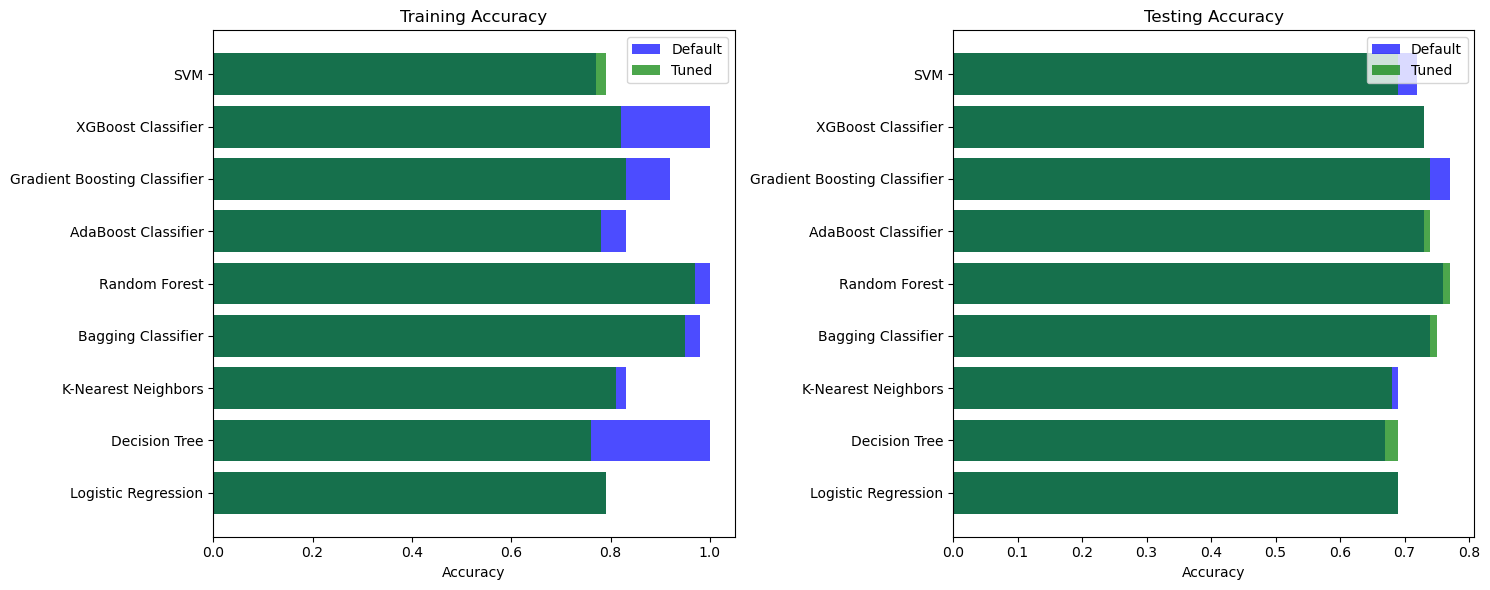

In [22]:
# Model names
models = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Bagging Classifier', 
          'Random Forest', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'XGBoost Classifier', 'SVM']

# Training and Testing accuracy values for default and tuned models
train_accuracy_default = [0.79, 1.00, 0.83, 0.98, 1.00, 0.83, 0.92, 1.00, 0.77]
test_accuracy_default = [0.69, 0.67, 0.69, 0.74, 0.76, 0.73, 0.77, 0.73, 0.72]

train_accuracy_tuned = [0.79, 0.76, 0.81, 0.95, 0.97, 0.78, 0.83, 0.82, 0.79]
test_accuracy_tuned = [0.69, 0.69, 0.68, 0.75, 0.77, 0.74, 0.74, 0.73, 0.69]

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Training Accuracy
axes[0].barh(models, train_accuracy_default, label='Default', color='blue', alpha=0.7)
axes[0].barh(models, train_accuracy_tuned, label='Tuned', color='green', alpha=0.7)
axes[0].set_title('Training Accuracy')
axes[0].set_xlabel('Accuracy')
axes[0].legend()

# Plotting Testing Accuracy
axes[1].barh(models, test_accuracy_default, label='Default', color='blue', alpha=0.7)
axes[1].barh(models, test_accuracy_tuned, label='Tuned', color='green', alpha=0.7)
axes[1].set_title('Testing Accuracy')
axes[1].set_xlabel('Accuracy')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()